In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma
import patsy
import multiprocessing
from joblib import Parallel, delayed

from math314 import optim, pbootstrap as bootstrap, adjustedR2 as ar2, predict_normal

# 4 December 2019

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/possum.csv")

In [3]:
X = patsy.dmatrix(" ~ C(sex) + headL", data=df)
yX = np.c_[df.totalL, X]
betahat = optim(yX)
betahat

array([ 8.2614958 , -2.06457808,  0.86431347])

$$\text{totalL}_n\sim N(\mu_n, \sigma^2)$$
$$\mu_n = \beta_0 + \beta_1 * \underline{\text{Male}} + \beta_2 * \text{headL}$$ Where an underlined variable is an indicator

So to specifically state the line for Males:
$$(\beta_0 + \beta_1) + \beta_2 * \text{headL}$$
Where $\beta_0 + \beta_1$ is the intercept for males

In [4]:
X = patsy.dmatrix(" ~ C(sex) + headL + C(sex):headL", data=df)
yX = np.c_[df.totalL, X]
betahat = optim(yX)
betahat

array([-28.72150614,  45.08358854,   1.26565333,  -0.51073335])

This allows us to give females and males their own slopes within their own lines
$$\mu_n = \beta_0 + \beta_1*\underline{\text{Male}} + \beta_2 * \text{HeadL}_n + \beta_3*\text{HeadL}_n*\underline{\text{Male}}$$

Using our previously attained variables:
#### Females
$$-28.72 + 1.27\text{HeadL}_n$$

In [5]:
var = 90
np.sum(np.asarray([1,0,var,0]) * betahat)

85.18729361426995

If a female possum had a head length of 90mm, we could expect it to have a total length of 85.19cm.

In [6]:
np.sum(np.asarray([1,1,var,var]) * betahat)

84.30488102434832

If a male possum had a head length of 90mm, we could expect it to have a total length of 84.30cm.

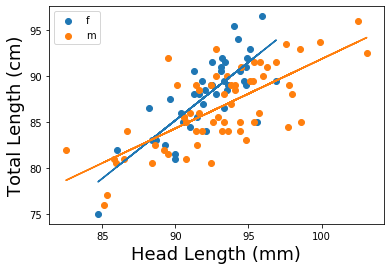

In [18]:
for i, (name, gdf) in enumerate(df.groupby('sex')):
    x = gdf.headL;
    bp.point(x, gdf['totalL'], color=bp.color[i], label = name)
    idx = df['sex'] == name
    bp.line(x, predict_normal(betahat, X[idx, :]), color = bp.color[i])

bp.labels(x="Head Length (mm)", y = "Total Length (cm)", size = 18)
bp.legend()